# Creative Diversity and TikTok Ad Performance: An Analysis of CDS Dimensions and CTR (Reproducibility Notebook)

This Jupyter notebook reproduces and supports the results from “Creative Diversity and TikTok Ad Performance: An Analysis of CDS Dimensions and CTR”. We will explore the dataset, perform descriptive analyses, and build predictive models (Parametric and Non-Parametric) to validate the paper’s conclusions. Each step is accompanied by explanations to ensure clarity and reproducibility.

In [1]:
# Core libs
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("../../data/datasets/tiktok_topads_clean.csv")

# Basic dataset shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Preview the first 5 rows
display(df.head())
display(df.tail())
display(df.info())

Dataset shape: (578, 21)
Columns: ['ad_title', 'brand_name', 'cost', 'ctr', 'id', 'like', 'video_name', 'is_ugc', 'duration', 'height', 'width', 'industry_parent', 'industry_child', 'objective_value', 'creative_theme', 'creative_concept', 'format_production_style', 'talent_type', 'demographic_representation', 'audience_focus', 'campaign_objective']


,ad_title,brand_name,cost,ctr,id,like,video_name,is_ugc,duration,height,...,industry_parent,industry_child,objective_value,creative_theme,creative_concept,format_production_style,talent_type,demographic_representation,audience_focus,campaign_objective
0,Great time killer!,Survival Game Master,2,0.01,7132878852058906625,38213,ad_23000000000_2_0_1,True,30.974,1280,...,News & Entertainment,Games & Utility Software,App Installs,Promotional & Offer-Based,Product demo,Native Video,Influencers,Primarily Male,Unaware Audience,App Promotion
1,Oddly satisfying game,Gameworld Master,2,0.01,7109275920046178305,14299,ad_23000000000_2_1_1,False,37.334,1024,...,News & Entertainment,Games & Utility Software,App Installs,Product-Centric,Product demo,Native Video,NaN,No People Featured,Unaware Audience,Awareness
2,My friend recommended me to play this game,Sugarcane Inc. Empire Tycoon,0,0.02,7077499601561305089,2427,ad_23000000000_2_2_1,False,17.323,1024,...,News & Entertainment,Games & Utility Software,App Installs,Educational & Explainer,Product demo,Animation & Motion Graphics,NaN,No People Featured,Unaware Audience,Awareness
3,download now,"Smart VPN - Fast, Stable",2,0.02,7176836203668783106,124771,ad_23000000000_2_3_1,False,53.015,1280,...,News & Entertainment,Games & Utility Software,App Installs,Lifestyle & Aspirational,Before-and-after story,Animation & Motion Graphics,NaN,Primarily Female,Unclear,Engagement
4,Play ten minutes a day to relieve stress!,Sugarcane Factory 3D,0,0.02,7077499507373899777,2739,ad_23000000000_2_4_1,True,14.016,1024,...,News & Entertainment,Games & Utility Software,App Installs,Product-Centric,Product demo,Animation & Motion Graphics,NaN,No People Featured,Unaware Audience,App Promotion


,ad_title,brand_name,cost,ctr,id,like,video_name,is_ugc,duration,height,...,industry_parent,industry_child,objective_value,creative_theme,creative_concept,format_production_style,talent_type,demographic_representation,audience_focus,campaign_objective
573,Let’s check out these Judy Blue pull on shorts...,NaN,2,0.02,7208678574701985794,3435,ad_22000000000_14_1_1,True,129.677,1280,...,Apparel & Accessories,Women's Clothing,Product sales,Product-Centric,Product demo,Native Video,Actors,Primarily Female,Product Aware,Sales
574,Back to school clothing haul W/ @calithekid_ -...,TwillMKT,2,0.03,7138658492106047490,22938,ad_22000000000_14_2_1,True,21.884,1024,...,Apparel & Accessories,Men's Clothing,Product sales,Product-Centric,Unboxing,Native Video,Influencers,Primarily Young Adults,Product Aware,Sales
575,You Sold These Out Last Time,JEM CITY,2,0.13,7154668616717778946,7150,ad_22000000000_14_3_1,False,9.067,1024,...,Apparel & Accessories,Men's Clothing,Product sales,Product-Centric,Product demo,Native Video,NaN,No People Featured,Unclear,Sales
576,Vintage Inspired Fleeces! Buy yours.,JEM CITY,2,0.14,7154671305471754241,4427,ad_22000000000_14_4_1,True,9.126,1024,...,Apparel & Accessories,Men's Clothing,Product sales,Product-Centric,Product demo,Native Video,NaN,No People Featured,Unclear,Awareness
577,Our new Micro Bags hold more than you think! 💁...,NaN,2,0.30,7221539646094213121,3778,ad_22000000000_14_5_1,True,18.505,1024,...,Apparel & Accessories,Bags,Product sales,Product-Centric,Product demo,Native Video,NaN,Unclear,Unclear,Awareness


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ad_title                    577 non-null    object 
 1   brand_name                  449 non-null    object 
 2   cost                        578 non-null    int64  
 3   ctr                         578 non-null    float64
 4   id                          578 non-null    int64  
 5   like                        578 non-null    int64  
 6   video_name                  578 non-null    object 
 7   is_ugc                      578 non-null    bool   
 8   duration                    578 non-null    float64
 9   height                      578 non-null    int64  
 10  width                       578 non-null    int64  
 11  industry_parent             578 non-null    object 
 12  industry_child              578 non-null    object 
 13  objective_value             578 non

None

In [3]:
# Fill NaN values in 'talent_type' with 'None'
df['talent_type'] = np.where(df['talent_type'].isna(), 'None', df['talent_type'])

# Fill NaN values in 'creative_concept' with 'Not Applicable'
df['creative_concept'].fillna('Not Applicable', inplace=True)

# Check for NaN values in the dataset
print("NaN values in dataset after filling 'talent_type':")
print(df.isna().sum())

NaN values in dataset after filling 'talent_type':
ad_title                        1
brand_name                    129
cost                            0
ctr                             0
id                              0
like                            0
video_name                      0
is_ugc                          0
duration                        0
height                          0
width                           0
industry_parent                 0
industry_child                  0
objective_value                 0
creative_theme                  0
creative_concept                0
format_production_style         0
talent_type                     0
demographic_representation      0
audience_focus                  0
campaign_objective              0
dtype: int64


/var/folders/jd/p9qckx717kgg0snnn30wxrp80000gn/T/ipykernel_41666/3008842934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creative_concept'].fillna('Not Applicable', inplace=True)


## Univariate Descriptive Analysis

In this section, we perform descriptive analyses to understand the distribution of CTR and how CTR varies across categories of each creative dimension. We use Seaborn for plotting with a style resembling R’s ggplot (grid background, pastel colors) for clarity. All plots have labeled axes and, where appropriate, error bars or distribution displays to give a sense of variability.

In [4]:
# Set aesthetics similar to R's ggplot style
sns.set_theme(style="whitegrid", palette="pastel")

### CTR Distribution


We start by examining the distribution of the click-through rate (CTR) across all ads. This gives us insight into how CTR values are spread out – for instance, whether most ads have low CTR with a few high performers (skewed distribution) or a more uniform spread.

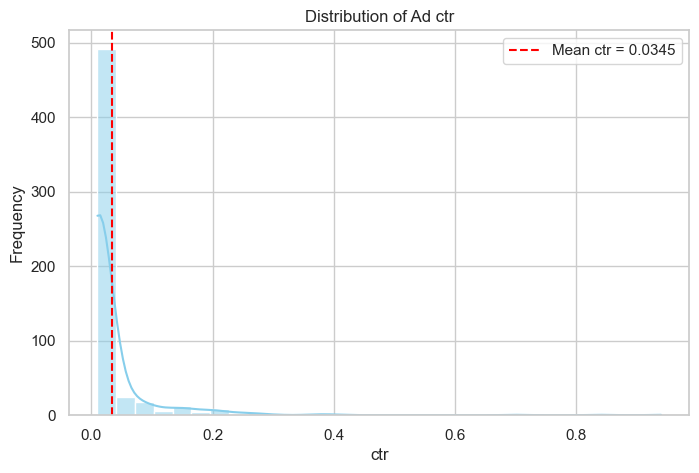

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['ctr'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Ad ctr")
plt.xlabel("ctr")
plt.ylabel("Frequency")
# Mark the mean ctr with a vertical line
mean_ctr = df['ctr'].mean()
plt.axvline(mean_ctr, color='red', linestyle='--', linewidth=1.5, label=f"Mean ctr = {mean_ctr:.4f}")
plt.legend()
plt.show()

### Ad Counts by Creative Feature

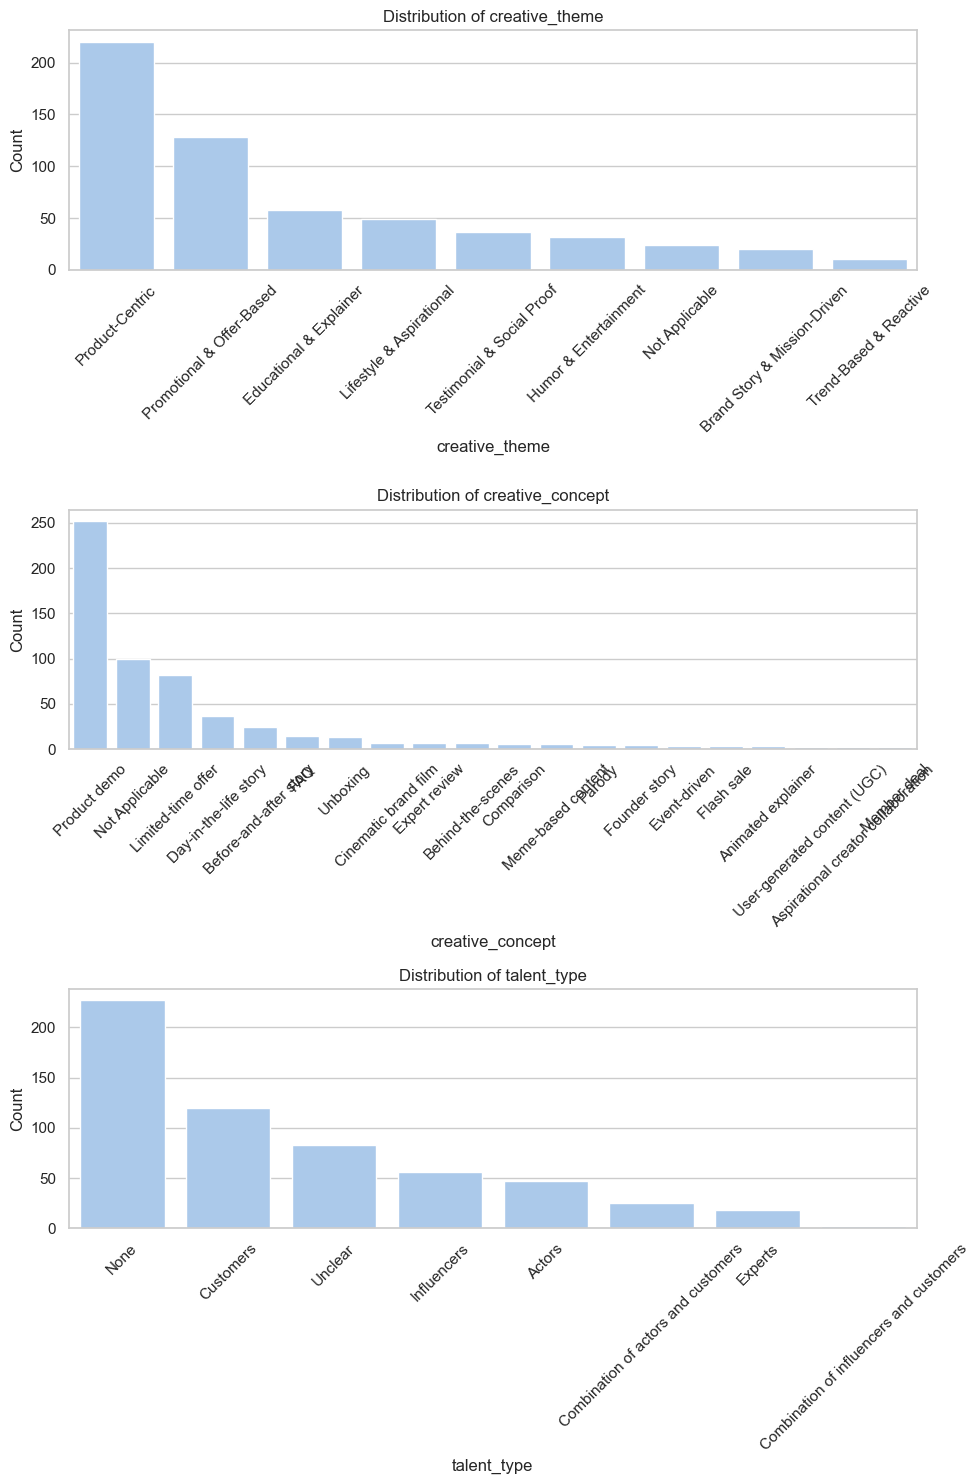

In [10]:
creative_features = ['creative_theme', 'creative_concept', 'talent_type']

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=False)
axes = axes.flatten()

for ax, feature in zip(axes, creative_features):
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

# Hide the unused subplot (the 6th one)
if len(creative_features) < len(axes):
    for i in range(len(creative_features), len(axes)):
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### CTR by Creative Feature


Next, we analyze average CTR by creative feature, that is, how well performs each value of the creative diversity dimensions

In [7]:
def plot_feature_bubble(df, feature):
    """
    Plots a bubble scatter plot for a given creative feature:
    X = count of ads per feature value
    Y = mean CTR per feature value
    Bubble = feature value (labeled)
    """
    means = df.groupby(feature)['ctr'].mean()
    counts = df[feature].value_counts()
    values = means.index
    counts_aligned = counts[values]

    plt.figure(figsize=(10,6))
    plt.scatter(
        counts_aligned.values,      
        means.values,               
        s=counts_aligned.values*10, 
        alpha=0.6,
        color='skyblue',
        edgecolor='k'
    )
    plt.xlabel(f"Total Ads (per {feature.replace('_', ' ').title()})")
    plt.ylabel("Average CTR")
    plt.title(f"CTR vs. Ad Count by {feature.replace('_', ' ').title()}")

    # Annotate each bubble with the feature value
    for i, val in enumerate(values):
        plt.text(
            counts_aligned.values[i], means.values[i], str(val),
            fontsize=9, ha='center', va='center'
        )

    plt.tight_layout()
    plt.show()

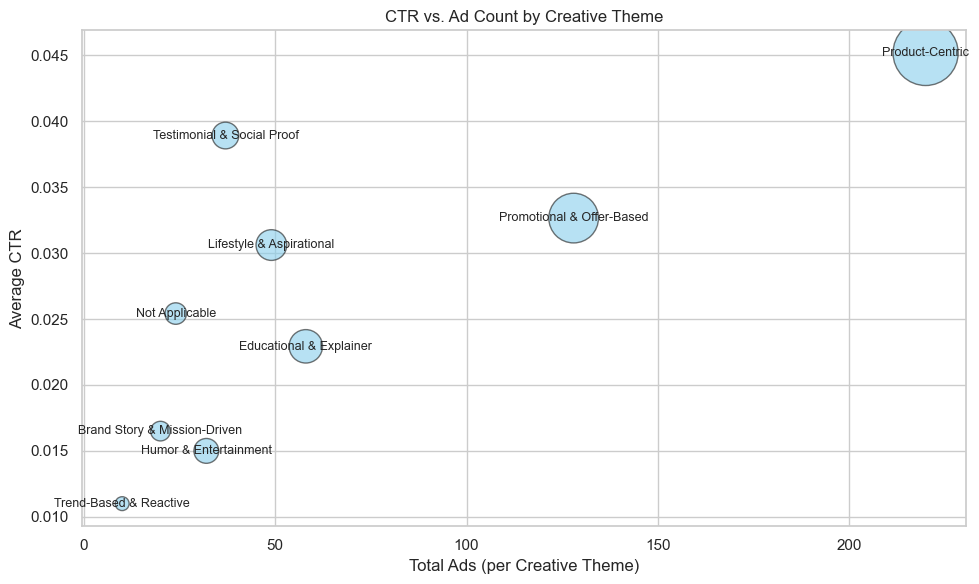

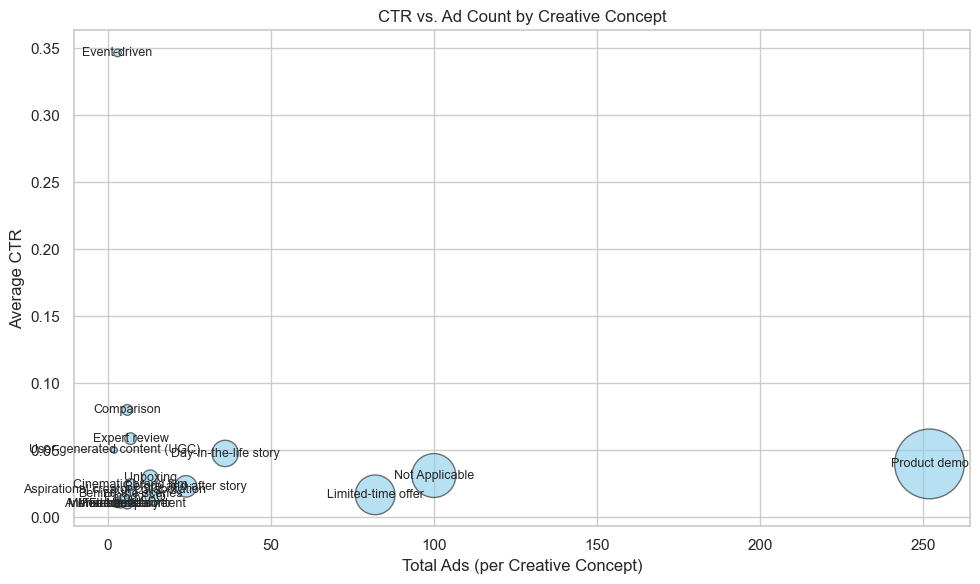

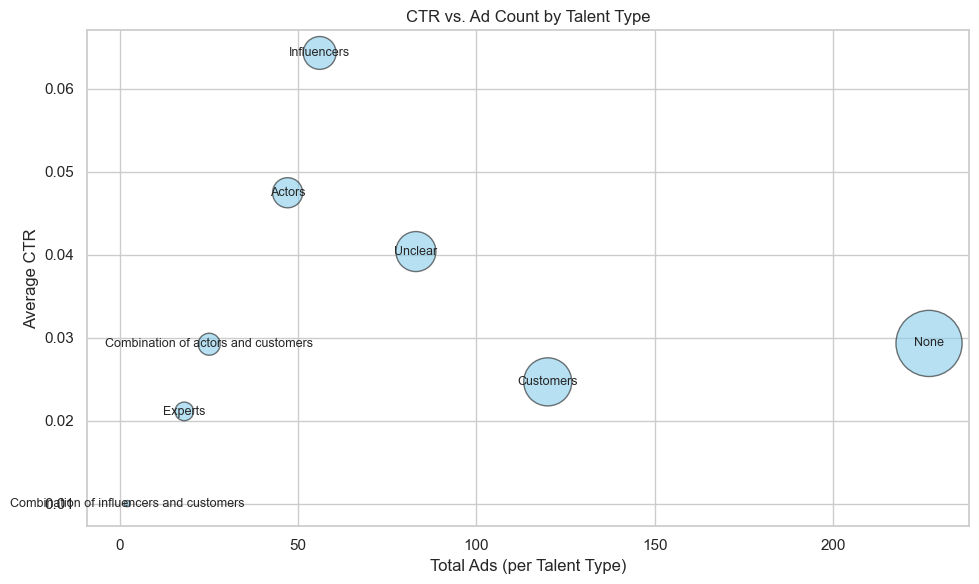

In [8]:
for feature in ['creative_theme', 'creative_concept', 'talent_type']:
    plot_feature_bubble(df, feature)

## 4. Multivariate Analysis

### OLS Regression (Standarized)

In [9]:
# Select the five creative dimensions as features
features = ['creative_theme', 'creative_concept', 'talent_type', 'objective_value', 'campaign_objective', 'duration']

# If grouping was demonstrated above but the dataset was already transformed, use the original columns for modeling
# (Assume df already has grouped categories including 'Other' where applied)
X = pd.get_dummies(df[features], drop_first=False)
y = df['ctr']

# Standardize features (0 mean, 1 std). Note: Dummy variables will be standardized as well.
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Standardize the target as well
y_std = (y - y.mean()) / y.std()

# Add constant (intercept) to the model
X_std_const = sm.add_constant(X_std)

# Fit OLS regression on standardized data
ols_model = sm.OLS(y_std, X_std_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     8.686
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           5.03e-39
Time:                        15:46:51   Log-Likelihood:                -666.39
No. Observations:                 578   AIC:                             1421.
Df Residuals:                     534   BIC:                             1613.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

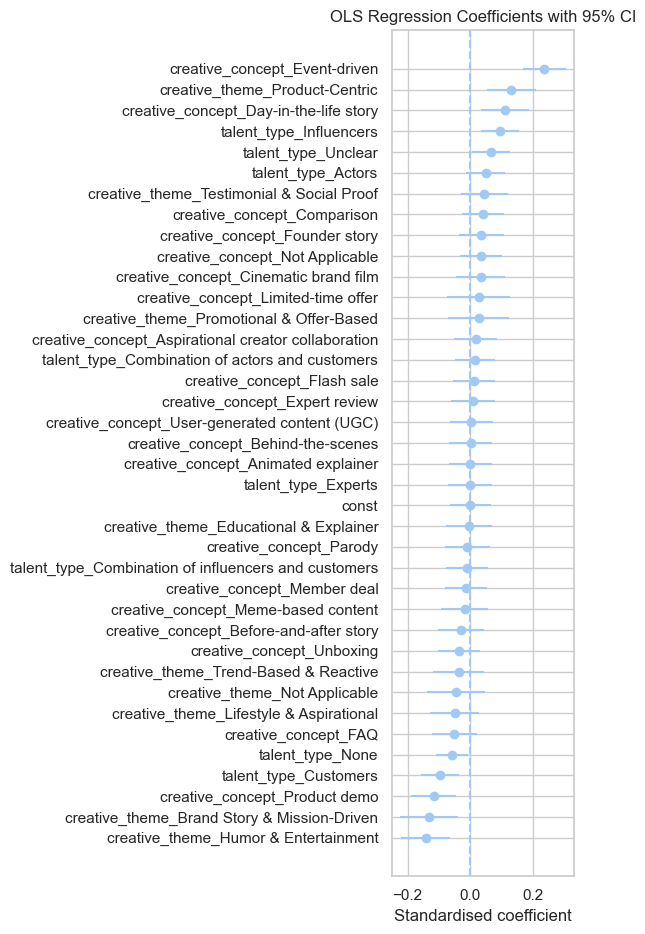

In [10]:
coefs = ols_model.params.rename("coef")
ses   = ols_model.bse.rename("se")
ci95  = pd.DataFrame({"lower": coefs - 1.96*ses,
                      "upper": coefs + 1.96*ses})

df = pd.concat([coefs, ci95], axis=1).reset_index().rename(columns={"index":"term"})
df = df.sort_values("coef")                    

mask = (~df.term.str.startswith("objective_value_") &
        ~df.term.str.startswith("campaign_objective_") &
        (df.term != "duration"))

df_focus = df[mask].sort_values("coef")

plt.figure(figsize=(6, len(df_focus)*0.25))
plt.hlines(df_focus.term, df_focus.lower, df_focus.upper)
plt.plot(df_focus.coef, df_focus.term, "o")
plt.axvline(0, ls="--")                        
plt.xlabel("Standardised coefficient")
plt.title("OLS Regression Coefficients with 95% CI")
plt.tight_layout()
plt.savefig("ols_forestplot.pdf")

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)  # using original (non-standardized) features is fine for importance

# Extract feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
# Sort features by importance
importances_sorted = importances.sort_values(ascending=False)

print("Top 10 most important features (Random Forest):")
print(importances_sorted)

Top 10 most important features (Random Forest):
duration                                                3.283596e-01
objective_value_Conversions                             1.782977e-01
creative_concept_Event-driven                           1.109496e-01
objective_value_Product sales                           6.949189e-02
campaign_objective_Engagement                           6.333027e-02
talent_type_None                                        2.591735e-02
talent_type_Actors                                      1.825111e-02
campaign_objective_Sales                                1.757661e-02
talent_type_Unclear                                     1.602793e-02
creative_concept_Comparison                             1.588877e-02
creative_theme_Humor & Entertainment                    1.465592e-02
talent_type_Customers                                   1.413188e-02
objective_value_App Installs                            1.387260e-02
talent_type_Influencers                                

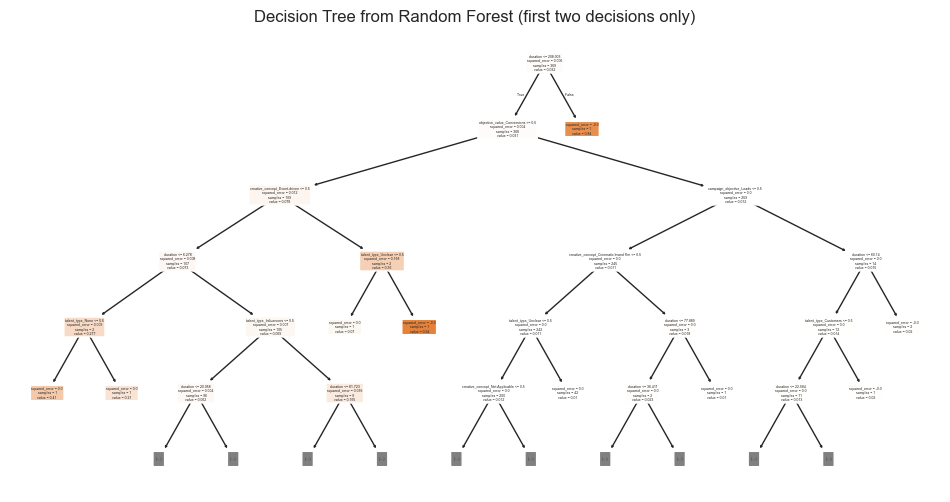

In [13]:
from sklearn.tree import plot_tree

# Visualize only the first two decisions (splits) of the first tree
plt.figure(figsize=(12, 6))
plot_tree(rf.estimators_[0], feature_names=X.columns, max_depth=5, filled=True, rounded=True)
plt.title("Decision Tree from Random Forest (first two decisions only)")
plt.show()

Spearman correlation between absolute OLS coefficients and RF importances: 0.68 (p-value=0.000)


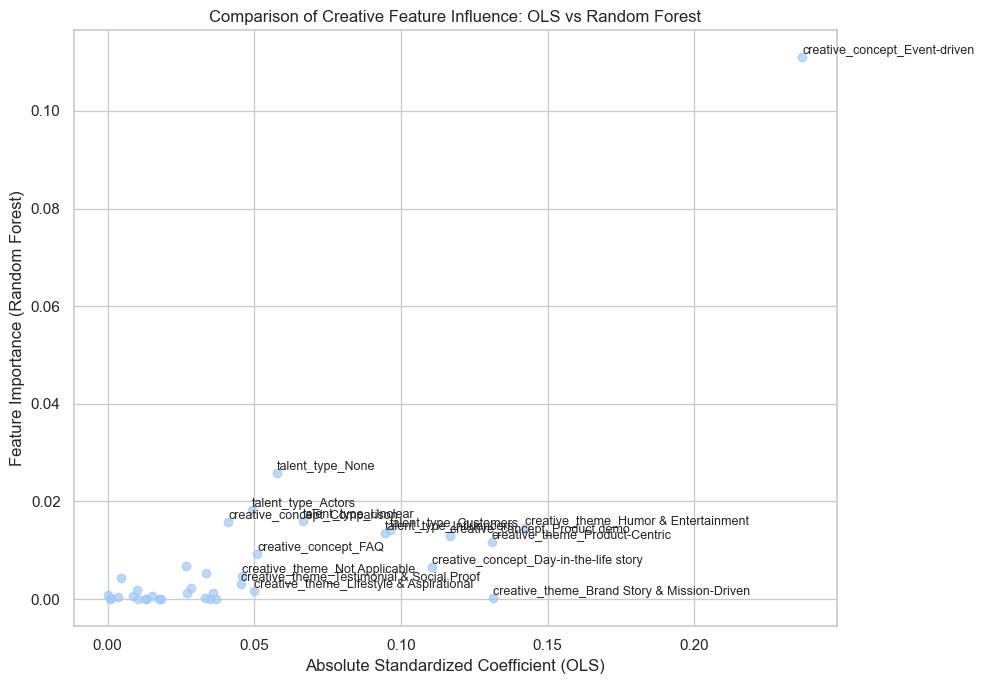

In [24]:
creative_features = ['creative_concept', 'creative_theme', 'talent_type']

# Prepare data for comparison
ols_coef_abs = coefs.abs()
rf_importance = importances

# Filter to only creative feature dummies
mask = ols_coef_abs.index.to_series().apply(lambda x: any([x.startswith(f) for f in creative_features]))
ols_vs_rf_creative = pd.DataFrame({
    'OLS_coef_abs': ols_coef_abs[mask],
    'RF_importance': rf_importance[mask]
})

# Compute Spearman rank correlation
from scipy.stats import spearmanr
rho, pval = spearmanr(ols_vs_rf_creative['OLS_coef_abs'], ols_vs_rf_creative['RF_importance'])
print(f"Spearman correlation between absolute OLS coefficients and RF importances: {rho:.2f} (p-value={pval:.3f})")

# Scatter plot
median_ols = 0.04
median_rf = 0.06

plt.figure(figsize=(10,7))
plt.scatter(ols_vs_rf_creative['OLS_coef_abs'], ols_vs_rf_creative['RF_importance'], alpha=0.7)

# Add labels for points above either median
for feature, row in ols_vs_rf_creative.iterrows():
    if (row['OLS_coef_abs'] > median_ols) or (row['RF_importance'] > median_rf):
        plt.text(row['OLS_coef_abs'], row['RF_importance'], feature, fontsize=9, ha='left', va='bottom')

plt.title("Comparison of Creative Feature Influence: OLS vs Random Forest")
plt.xlabel("Absolute Standardized Coefficient (OLS)")
plt.ylabel("Feature Importance (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()